# Машинное обучение, ШАД
## Лабораторная работа 3. Линейные модели классификации и регрессии, валидация моделей.


**Правила:**

* Выполненную работу нужно отправить в соответствующее задание в личном кабинете
* Дедлайн **5 октября 17:00 НСК**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Для сдачи задания нужно загрузить **ноутбук в формате `ipynb`** в ЛМС.
* Выполнять задание необходимо полностью самостоятельно.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Присылайте понятный и читаемый код. Если код не будет понятен проверяющему, оценка может быть снижена.
* Код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * прикрепив ее в ЛМС в форматах `pdf`, `png` или `jpg` *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $\LaTeX$ в markdown-ячейках или в отдельном `pdf`-файле.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 1 балл;
* Задача 2 &mdash; 1 балл;
* Задача 3 &mdash; 1 балл;
* Задача 4 &mdash; 1 балл;
* Задача 5 &mdash; 5 баллов.

----

---
### Задача 1. 

1. Пусть $X_1,...,X_n$ &mdash; выборка из гамма-распределения с плотностью $p_\theta(x) = \frac{\theta^\beta}{\Gamma(\beta)} x^{\beta-1} e^{-\theta x}$, где $\theta>0, \beta>0, x>0$, причем $\beta$ известно. Найдите оценку максимального правдоподобия параметра $\theta$.

2. Пусть $X_1,...,X_n$ &mdash; выборка из пуассоновского распределения, для которого $\mathsf{P}_\theta(X_i = k) = \frac{\theta^k}{k!}e^{-\theta}$, где $\theta>0, k \in \mathbb{Z}_+ = \{0, 1, 2, ...\}$. Найдите оценку максимального правдоподобия параметра $\theta$.

**Задача 1.1**

Построим логарифмическую функцию правдоподобия:
$$
l_{x}(\theta) = \sum_{i=1}^n \ln p_{\theta}(x)= n \beta \ln \theta-n \ln \Gamma(\theta) + (\beta-1) \sum_{i=1}^n\ln x_{i} - \theta \sum_{i=1}^n x_{i}
$$

Найдем максимум:


$$
\frac{ \partial l_{x} }{ \partial \theta } = \frac{n\beta}{\theta} - \sum_{i=1}^n x_{i} =0
$$

Откуда:

$$
\hat{\theta} = \frac{n\beta}{\sum_{i=1}^n x_{i}} = (\overline{x})^{-1}\beta
$$


**Задача 1.2**

Построим логарифмическую функцию правдоподобия:

$$
l_{x}(\theta) = \sum_{i=1}^n (x_{i}\ln\theta-\ln x_{i}!-\theta)=\ln \theta \sum_{i=1}^n x_{i}- \sum_{i=1}^n \ln x_{i}! - n\theta
$$

Ищем максимум

$$
\frac{ \partial l_{x} }{ \partial \theta } = \frac{\sum_{i=1}^n x_{i}}{\theta} - n =0
$$

Откуда

$$
\hat{\theta} = \overline{x}
$$

---
### Задача 2.

Пусть $\ell_Y(\theta)$ &mdash; логарифмическая функция правдоподобия в модели логистической регрессии, задачу максимизации которой мы рассматривали на лекции. Добавим к ней $L_2$-регуляризатор и будем рассматривать задачу
$$F(\theta) = -\ell_Y(\theta) + \lambda \|\theta\|^2  \longrightarrow \min_{\theta \in \mathbb{R}^d},$$
где $\lambda > 0$ &mdash; коэффициент регуляризации.

1. Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD).

2. Покажите, что $F(\theta)$ &mdash; выпуклая функция по $\theta$ и, как следствие, имеет единственный экстремум, являющийся глобальным максимумом. *Указание*. Посчитайте гессиан (матрицу вторых производных) и покажите, что она положительно определена.

3. Опишите, как может вести себя решение при отсутствии регуляризации, то есть при $\lambda = 0$

#### Задача 2.1

Выпишем градиент $F(\theta)$:

$$ \nabla F (\theta) =
- \sum_{i=1}^n x_{i} (y_{i}-\sigma(\langle  \theta, x_{i}\rangle )) + 2 \lambda \theta
$$

**GD**
$$
\theta_{t+1} = \theta_{t} + \eta[\sum_{i=1}^n x_{i}(\sigma(\langle \theta_{t}, x_{i} \rangle - y_{i})) + 2\lambda\theta_{t} ]
$$
В матричном виде:
$$
\theta_{t+1} = \theta_{t} + \eta [X^T (s(\theta_{t}) - Y)+2\lambda\theta_{t}]
$$
где $\vec{s}(\theta) = (\sigma(\theta^Tx_{i}))$ – вектор – столбец.

**SGD**

$$
\theta_{t+1} = \theta_{t} + \eta\left[ \frac{n}{k}\sum_{i \in I} x_{i}(\sigma(\langle \theta_{t}, x_{i} \rangle - y_{i})) + 2\lambda\theta_{t}  \right]
$$
где $I = \{ i_{1}, \dots i_{k} \} \sim \cup \{ 1, \dots n \}$.

В матричном виде;

$$
\theta_{t+1}= \theta_{t} + \eta [\frac{n}{k} X^T(Y-S(\theta_{t})_{I}) + 2\lambda\theta_{t}]
$$, где $X_{i}$ – строки матрицы $X$ соответствующие индексам $I$,
$Y_{i}$ – элементы вектора $Y$, соответствующие индексам $I$,
$S(\theta_{t})$ – аналогично.

#### Задача 2.2

$$F(\theta) = -\ell_Y(\theta) + \lambda \|\theta\|^2 $$
Выпишем градиент $F(\theta)$:
$$ \nabla F (\theta) =
- \sum_{i=1}^n x_{i} (y_{i}-\sigma(\langle  \theta, x_{i}\rangle )) + 2 \lambda \theta
$$
$j$ - я компонента градиента имеет следующий вид:

$$
\nabla F(\theta)_{j} = - \sum_{i=1}^n x_{ij}(y_{i}-\sigma(\langle \theta, x_{i} \rangle)) + 2\lambda\theta_{j} 
$$

Чтобы получить гессиан, выпишем производную по $k$-й компоненте $\theta$:

$$
\frac{ \partial^2  }{ \partial \theta_{j}\theta_{k} } F(\theta)=F(\theta)_{jk} = \sum_{i=1}^n (x_{ij}x_{ik}\sigma(\langle \theta, x_{i} \rangle )(1-\sigma(\langle \theta, x_{i} \rangle ))) + 2 \delta_{jk} \lambda
$$
, где $\delta_{jk}$ – символ Кронекера.

Обозначим за $D$ диагональную матрицу с элементами $\sigma(\langle \theta, x_{i} \rangle)(1-\sigma(\langle \theta, x_{i} \rangle))$, $I$ – единичная матрица. Тогда гессиан можно представить в виде:
$$
\nabla ^2 F = X^TDX+2\lambda E
$$
Так как $0 < \sigma(\langle \theta, x_{i} \rangle) < 1$, на диагонали стоят положительные числа, из которых можно извлечь квадратные корни, представив $D$ в виде $D = D^{1/2}D^{1/2}$. Матрица $X$ имеет полный ранг по столбцам, а матрица $2\lambda E$ – тоже диагональная с положительными числами. Тогда, для любого приращения $u\neq 0$ имеем

$$
u^T X^T DXu = u^TX^T(D^{1/2})^TD^{1/2}Xu = | D^{1/2}Xu|^2 >0
$$
Таким образом, функция $F$ выпукла вниз как функция от $\theta$, и, соответственно, точка её экстремума непременно будет точкой минимума (если точка экстремума существует). 

#### Задача 2.3
Без регуляризации, модель логистической регрессии будет склонна к переобучению. Это означает, что параметры $\theta$ будут настроены таким образом, чтобы минимизировать ошибку на обучающих данных, но при этом модель может быть неспособной к обобщению на новые данные. Можно рассмотреть пример, когда обучающая выборка идеально разделима и мы работаем в $\mathbb{R}^2$. Представим, что данные не пересекаются и разделяются вертикальной линией $x=0$. Запишем логарифмическую ФМП:
$$
l_{y}(\theta)= \sum_{i=1}^n [y_{i}\log \sigma(\theta^Tx_{i})+(1-y_{i})\log(1-\sigma(\theta^Tx_{i}))]
$$
При $y_{i}=0$ рассматриваем член $\log(1-\sigma(\theta^Tx_{i}))$
При $y_{i}=1$ рассматриваем член $\log \sigma(\theta^Tx_{i})$.

В итоге, при 
$$
\lim_{ \theta \to \infty } \log(1-\sigma(\theta^Tx_{i})) =0
$$
$$
\lim_{ \theta \to \infty } \log \sigma(\theta^T x_{i}) = 0
$$
Получаем, что $\theta$ монотонно возрастает. У целевой функции нет максимума, поэтому, процесс оптимизации привет к устремлению весов в бесконечность. 

---
### Задача 3.

Рассмотрим линейную регрессию $y(x) = x^T \theta$, причем для оценки $\theta$ будем рассматривать функцию потерь Хьюбера
$$R(x) = \frac{x^2}{2} I\{|x| \leqslant c\} + c\left(|x| - \frac{c}{2}\right)I\{|x| > c\}.$$

Тем самым задача оптимизации имеет вид
$$\sum_{i=1}^n R(Y_i + x_i^T \theta) \longrightarrow \min_{\theta \in \mathbb{R}^d}.$$

1. Нарисуйте график $R(x)$. В чем польза выбора такой функции потерь?

2. Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD).

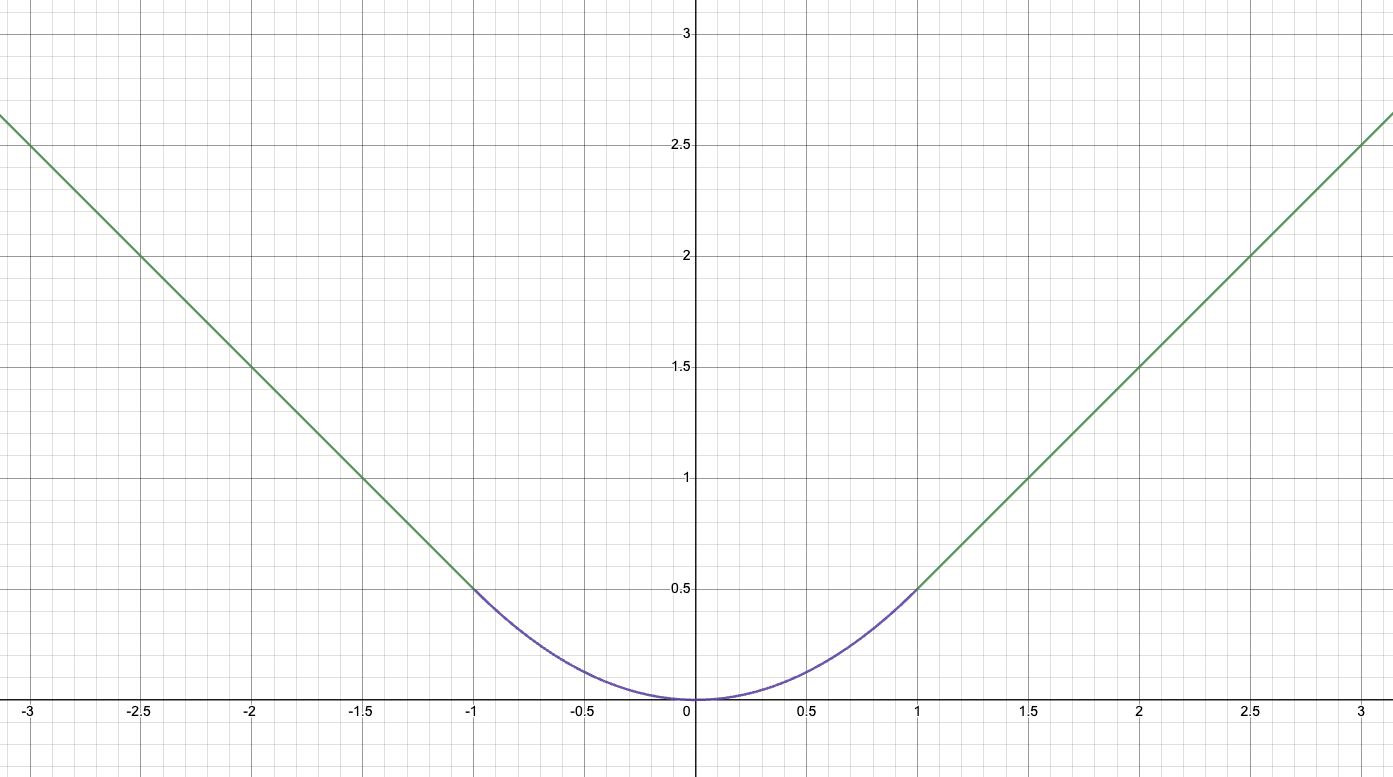

По сути, функция потерь Хьюбера – комбинация MSE и MAE (опуская среднее значение), она квадратична для малых x, линейна для больших x. Иными словами, мы получаем что-то среднее, между сильной чувствительностью к выбросам (MSE) и игнорированием выбросов (MAE). Такая функция потерь хороша сработает, когда мы хотим дать небольшой, сердний вес выбросам.

**GD**:
$$
\theta_{t+1}= \theta_{t} - \eta\left( \frac{1}{2}X^T(X\theta_{t}-y)I\{ X\theta_{t}-y\leq c \} + cX^Tsign(X\theta_{t}-y)I\{ X\theta_{t}-y > c \}\right)
$$

**SGD**:
$$
\theta_{t+1}= \theta_{t} - \eta\left( \frac{n}{k}\sum_{i \in I}\left[ \frac{1}{2}x_{i}(x_{i}^T\theta_{t}-y)I\{ X\theta_{t}-y \leq c \} + c x_i sign(x_i^T\theta_{t}-y_i)I\{ X\theta_{t}-y > c \} \right]\right)
$$, где $I = \{ i_{1}, \dots i_{k} \} \sim \cup \{ 1, \dots n \}$


---
### Задача 4.

В предыдущем домашнем задании вы подробно познакомились с линейными моделями, выяснили о необходимости обработки непрерывных и категориальных признаков, узнали о способах подбора гиперпараметров. Порассуждайте над следующими вопросами.

**1.** Какие побочные эффекты могут возникунуть при стандартизации (нормализации) признаков с помощью `StandardScaler`, `MinMaxScaler`? Что с этим можно сделать?

`StandardScaler` – приводит среднее в 0 и дисперсию в единичную. Выборосы в данных могут влиять на эмпирическое среднее и дисперсию, поэтому, проблема такого подхода в том, что разные признаки могут иметь разный диапазон значений. 

`MinMaxScaler` – преобразует данные так, чтобы все значения признака лежали в диапазоне [0, 1]. Тоже сильно чувствителен к выбросам, можно получить ситуацию, когда все inliers (не выбросы) сжимаются в очень маленький промежуток значений из-за присутствия выбросов.

Если в данных присутстувуют выбросы, можно сделать предобработку данных, попробовать совсем от них избавиться, если это возможно в рамках задачи. Также, можно попробовать использовать другие методы стандартизации признаков: например, `RobustScaler`, который менее устойчив к выбросам, благодаря тому, что работает с перцентилями и более робастен к небольшому количеству выбросов. 

**2.** Рассмотрим пример с первого занятия про модель потребления мороженного от температуры:
$$ic=\theta_1 + \theta_2 t.$$
Предположим, что нам также известен еще один признак, отвечающий за год. Обозначим его за $y$. Пусть $y \in \{1, 2, 3\}$. Попробуем учесть влияние года двумя разными способами:
* Модель $ic = \theta_1 + \theta_2 t+ \theta_3 y_1 + \theta_4 y_2$, где $y_1 = I\{y=1\}$, $y_2 = I\{y=2\}$.
* Для каждого года рассматривается своя линейная зависимость $ic=\theta_1+\theta_2 t$.
  
Поясните, в чем различие этих двух подходов.


В первом подходе влияние года учитывается через индикаторы, что позволяет иметь общую модель для всех лет. Отпимизация параметров не стоящих под индикаторами года будет идти для всех данных, за все года. Во втором подходе для каждого года строится своя отдельная модель, что позволяет учесть абсолютно любые различия в зависимости между температурой и потреблением мороженого для разных лет, но требует больше параметров и данных для оценки (нужнен полный набор данных за каждый год). Выбор между этими двумя подходами зависит от предположений о характере влияния года и доступных данных.

**3.** Визуализируйте совместные распределения вещественных признаков и целевой переменной для данных из предыдущего домашнего задания. Что можно сказать о зависимости таргета от признаков? Сделайте вывод о том, насколько хорошо построенные модели приближают истинные зависимости. 

Полученные графики приложите к решению теоретического задания.

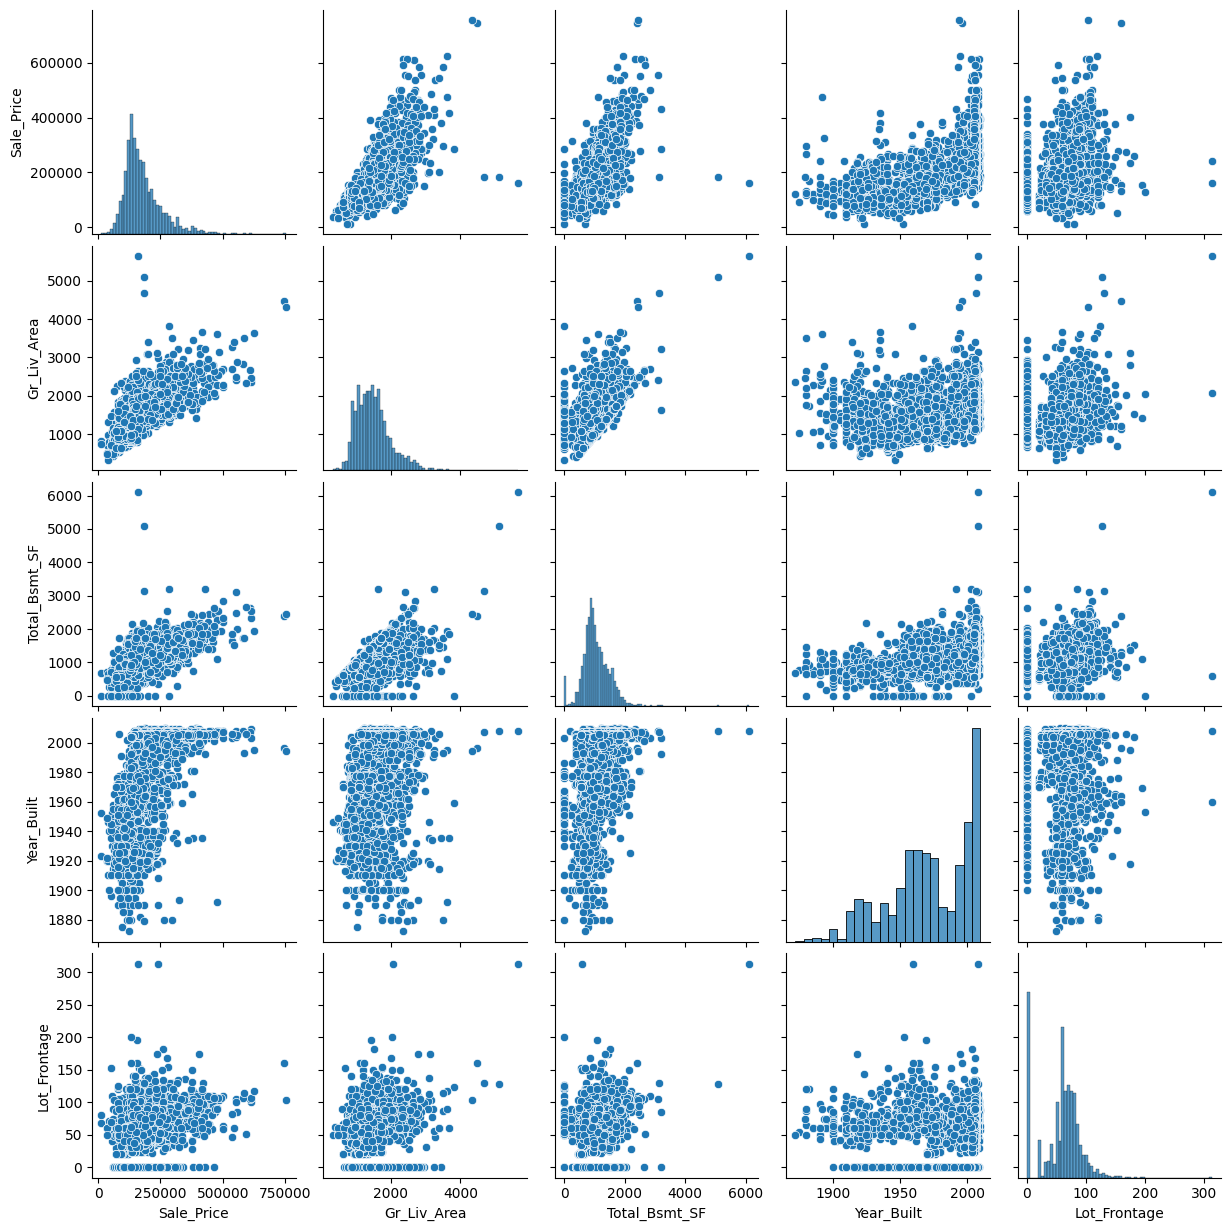

In [3]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('./data.csv')
continuous_columns = ['Sale_Price', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'Year_Built', 'Lot_Frontage']
sns.pairplot(data[continuous_columns])


В случае некоторых признаков (например Gr_Liv_Area или Total_Bsmt_SF) видна линейная зависимость, в то время как у других большой разброс. Интересно также выглядит совместное распределение Gr_Liv_Area и Total_Bsmt_SF, где можно увидеть почти-что линию которая ограничивает распределение сверху. Это ожидаемо, т.к. площадь подвала зачастую не превосходит 'жилищной' площади дома. График совместного распределения Year_Built и Sale_Price тоже наталкивает на интересные мысли – границы облака точек сверху и снизу напоминают экспоненту – цены на недвижимость в зависимости от года не слишком резко, но экспоненциально растут. 

---
### Задача 5.

Реализуйте логистическую регрессию с $L_2$ регуляризацией для поиска оценки параметров с помощью стохастического mini-batch градиентного спуска (SGD).

In [1]:
import numpy as np
from scipy.special import expit
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

In [104]:
class LogisticRegression(BaseEstimator, ClassifierMixin):
    '''
    Модель логистической регрессии. Имеет следующие гиперпараметры:

    :param alpha: параметр регуляризации. 
                  Если равно 0, то регуляризация не происходит.
    :param lr: константа, на которую домножаем градиент при обучении
    :param max_iter: ограничение на кол-во итераций
    :param fit_intercept: указывает, следует ли добавить константу в признаки
    '''

    def __init__(self, alpha=0, lr=0.5, tol=1e-7, max_steps=1500, batch_size=64,
                 fit_intercept=True, verbose=False):
        '''Создает модель и инициализирует параметры.'''

        self.alpha = alpha
        self.lr = lr
        self.tol = tol
        self.fit_intercept = fit_intercept
        self.random_state = 42
        self.max_steps = max_steps
        self.batch_size = batch_size
        self.verbose = verbose
        self.classes_ = np.array([0, 1])

    @staticmethod
    def _sigmoid(x):
        return expit(x)

    def _add_intercept(self, X):
        '''
        Добавляем свободный коэффициент к нашей модели. 
        Это происходит путем добавления вектора из 1 к исходной матрице.

        :param X: исходная матрица признаков
        :return: матрица X с добавленным свободным коэффициентов
        '''

        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1.)
        X_copy[:, :-1] = X

        return X_copy
    
    def _initialize_weights(self, n_features):
        rng = np.random.default_rng(self.random_state)
        self.W = rng.standard_normal(n_features)

    def _batch_indexes(self, shape):
        indexes = np.arange(shape)
        np.random.shuffle(indexes)
        return indexes
    
    def _compute_loss(self, X, y):
        predictions = self._sigmoid(np.dot(self.W, X.T))
        loss_1 = y.T.dot(np.log(predictions))
        loss_2 = (1-y).T.dot(np.log(1-predictions))
        loss = -((loss_1 + loss_2))/y.shape[0] + self.alpha * np.sum(self.W ** 2)
        return loss
    
    def _compute_gradients(self, X_batch, y_batch):
        predictions = self._sigmoid(np.dot(self.W, X_batch.T))
        errors = predictions - y_batch
        regularization_grad = 2 * self.alpha * self.W
        regularization_grad[-1] = 0
        grad = X_batch.T.dot(errors)/len(X_batch) - regularization_grad
        return grad

    def fit(self, X, Y):
        '''
        Обучает модель логистической регресии с помощью SGD,
        пока не выполнится self.max_iter итераций.

        :param X: матрица признаков
        :param Y: истинные метки
        '''

        assert X.shape[0] == Y.shape[0]
        if self.fit_intercept:  # добавляем свободный коэфициент
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        self._initialize_weights(X_copy.shape[1])
        in_size = X_copy.shape[0]
        prev_loss = float("inf")

        for step in range(self.max_steps):
            shuffle_indexes = self._batch_indexes(in_size)

            for i in range(0, in_size, self.batch_size):
                idx = shuffle_indexes[i:(i + self.batch_size)]
                X_batch = X_copy[idx]
                y_batch = Y[idx]
                grad = self._compute_gradients(X_batch, y_batch)
                self.W -= self.lr * grad

            
            if self.tol is not None:
                loss = self._compute_loss(X_copy, Y)
                if self.verbose:
                    print(f"step: {step}, loss: {loss}")
                if prev_loss - loss < self.tol:
                    break
                prev_loss = loss

        self.coef_ = self.W[:-1]
        self.intercept_ = self.W[-1]
        return self

    def predict(self, X):
        '''
        Применяет обученную модель к данным 
        и возвращает точечное предсказание (оценку класса).

        :param X: матрица признаков
        :return: предсказание с размерностью (n_test, )
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()
        
        assert X_copy.shape[1] == self.W.shape[0]
 
        predictions = self._sigmoid(np.dot(self.W, X_copy.T))

        return [1 if p > 0.5 else 0 for p in predictions]

    def predict_proba(self, X):
        '''
        Применяет обученную модель к данным
        и возвращает предсказание вероятности классов 0 и 1.

        :param X: матрица признаков
        :return: вероятности предсказания с размерностью (n_test, 2)
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.W.shape[0]

        prob_predictions = self._sigmoid(np.dot(self.W, X_copy.T))

        return prob_predictions

Рассмотрим игрушечный датасет на $30$ признаков `load_breast_cancer` из библиотеки `sklearn`. Это относительно простой для бинарной классификации датасет по диагностике рака молочной железы.

Ради интереса можно прочитать описание признаков.

In [105]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = load_breast_cancer()
dataset['DESCR'].split('\n')[11:31]

['    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        worst/largest values) of these features were computed for each image,',
 '        resulting in 30 features.  For instance, field 0 is Mean Radius, field',
 '        10 is Radius SE, field 20 is Worst Radius.',
 '',
 '        - class:',
 '                - WDBC-Malignant',
 '                - WDBC-Benign']

Разделим нашу выборку на обучающую и тестовую:

In [106]:
X, Y = dataset['data'], dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

При использовании регуляризации данные необходимо нормализовать. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`. 

In [107]:
scaler = StandardScaler()

Теперь обучите модель логистической регрессии.

In [108]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression(verbose=True))

pipe.fit(X_train, Y_train)
test_preds = pipe.predict(X_test)
print("accuracy: ", accuracy_score(Y_test, test_preds))

step: 0, loss: 0.25247365783651166
step: 1, loss: 0.16306757417345918
step: 2, loss: 0.13237953044928868
step: 3, loss: 0.12041829985538467
step: 4, loss: 0.11218651332916385
step: 5, loss: 0.10670167472064039
step: 6, loss: 0.10248750244078231
step: 7, loss: 0.0988233005676995
step: 8, loss: 0.09633593355521272
step: 9, loss: 0.09278577855159927
step: 10, loss: 0.0914501841622992
step: 11, loss: 0.093875240209565
accuracy:  0.9824561403508771


На занятии обсуждали, что в нашей постановке задачи при сравнении выиграет модель с меньшим FN, ведь каждая не обнаруженная опухоль может стоить человеческой жизни. Чем меньше ложно отрицательных срабатываний, тем выше Recall модели, а значит разумно взять Recall в качестве целевой метрики. 

Построить модель с Recall = 1 довольно просто (Как?), но в ней не будет большого смысла, т.к., например, для нашей задачи отправление на доп. обследование может стоить дополнительных средств и времени специалистов, поэтому хотелось, чтобы наша модель имела неплохую точность. Какую метрику можно использовать, чтобы учесть и точность, и полноту?

Ответ: F1-score!

Выберите и посчитайте целевые метрики для нашей задачи.

In [109]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, test_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Рассмотрите как влияет размер шага (`learning rate`) на качество модели. Обучите каждую модель одинаковое число итераций (например, 10000), а затем посчитайте качество. Сделайте выводы.

In [67]:
lrs = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10]

In [68]:
from sklearn.metrics import f1_score

for lr in lrs:
    pipe = make_pipeline(StandardScaler(), LogisticRegression(tol=None, max_steps=1000, lr=lr))
    pipe.fit(X_train, Y_train)
    test_preds = pipe.predict(X_test)
    print(f"lr {lr}, f1: {f1_score(Y_test, test_preds)}")

lr 1e-05, f1: 0.6490066225165563
lr 0.0001, f1: 0.7724137931034482
lr 0.001, f1: 0.965034965034965
lr 0.01, f1: 0.9859154929577465
lr 0.1, f1: 0.9859154929577465
lr 0.2, f1: 0.9787234042553192
lr 0.3, f1: 0.9787234042553192
lr 0.5, f1: 0.9787234042553192
lr 0.7, f1: 0.9787234042553192
lr 1, f1: 0.9714285714285714
lr 2, f1: 0.948905109489051
lr 5, f1: 0.9565217391304348
lr 10, f1: 0.9420289855072463


Лучше всего модель обучается с $lr \in [0.01, 0.1]$. При больших $lr$ возникают проблемы.

Рассмотрите несколько моделей, в которых установите не менее 5-ти различных коэффициентов регуляризации, а также модель без регуляризатора. Сравните, влияет ли наличие регуляризации на качество, сделайте выводы. Под качеством подразумевается значение какой-либо выбранной вами метрики качества классификации.

In [85]:
regs = [1, 0.5, 1e-1, 2e-1, 1e-2, 5e-2, 1e-3, 0]
for reg in regs:
    pipe = make_pipeline(StandardScaler(), LogisticRegression(alpha=reg, tol=None, max_steps=20, lr=lr))
    pipe.fit(X_train, Y_train)
    test_preds = pipe.predict(X_test)
    print(f"alpha {reg}, f1: {f1_score(Y_test, test_preds)}")

alpha 1, f1: 0.6115702479338843
alpha 0.5, f1: 0.628099173553719
alpha 0.1, f1: 0.948905109489051
alpha 0.2, f1: 0.9481481481481481
alpha 0.01, f1: 0.9859154929577465
alpha 0.05, f1: 0.9787234042553192
alpha 0.001, f1: 0.9859154929577465
alpha 0, f1: 0.9714285714285714


`Вывод: небольшое добавление регуляризации улучшает качество, значения ближе к 0.1 и большие – ухудшают качество, модель слишком сильно смотрит на важность регуляризационного члена`

Выберите наилучшее значение коэффициента регуляризации с помощью кросс-валидации для двух подходов &mdash; `KFold` и `ShuffleSplit`. Используйте пять фолдов/разбиений.

In [95]:
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit

print("KFold:")
for reg in regs:
    pipe = make_pipeline(StandardScaler(), LogisticRegression(alpha=reg, tol=None, max_steps=20, lr=lr))
    kf = KFold(n_splits=5)
    print(f"alpha {reg}, f1: {np.mean(cross_val_score(pipe, X, Y, cv=kf, scoring='f1'))}")

print("\nShuffleSplit")
for reg in regs:
    pipe = make_pipeline(StandardScaler(), LogisticRegression(alpha=reg, tol=None, max_steps=20, lr=lr))
    kf = ShuffleSplit(n_splits=5, random_state=42)
    print(f"alpha {reg}, f1: {np.mean(cross_val_score(pipe, X, Y, cv=kf, scoring='f1'))}")

KFold:
alpha 1, f1: 0.6459248715520497
alpha 0.5, f1: 0.8200177304964539
alpha 0.1, f1: 0.9507707234724894
alpha 0.2, f1: 0.9215259275820286
alpha 0.01, f1: 0.9677172250644677
alpha 0.05, f1: 0.9584981096780755
alpha 0.001, f1: 0.9760843487001027
alpha 0, f1: 0.9705268286276425

ShuffleSplit
alpha 1, f1: 0.6334975865021424
alpha 0.5, f1: 0.7777844482480079
alpha 0.1, f1: 0.9372634317111516
alpha 0.2, f1: 0.8966935540754927
alpha 0.01, f1: 0.9752324231190095
alpha 0.05, f1: 0.9507076058190339
alpha 0.001, f1: 0.9752324231190095
alpha 0, f1: 0.9759147374364765


`Лучше всего себя показывает alpha = 0.001, хотя, ее значение и метрики близки к модели без использования регуляризации`

Для выбранного значения коэффициента регуляризации оцените дисперсию усредненного значения метрики качества на тестовых батчах. Для этого выполните кросс-валидацию достаточно много раз (не менее 100) и посчитайте выборочную дисперсию. Обратите внимание, что для стратегии `KFold` нужно на каждой итерации перемешивать данные, для этого можно указать `shuffle=True`.

Сравните эти две стратегии кросс-валидации. Какие их преимущества и недостатки?

In [98]:
alpha = 0.001

stats = []

for _ in range(150):
    pipe = make_pipeline(StandardScaler(), LogisticRegression(alpha=reg, tol=None, max_steps=20, lr=lr))
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    stats.append(np.mean(cross_val_score(pipe, X_test, Y_test, cv=kf, scoring='f1')))

print(np.var(stats))

9.046966580848326e-06


Дисперсия достаточно мала, потому можно утверждать, что значения метрики полученные при первом подходе валидны.

**Вывод:** Первый подход позволяет подобрать оптимальные параметры, оценить обобщающую способность модели с разными параметрами. Кросс-валидация с KFold обычно более стабильна и надежна, чем одноразовое разделение данных на обучающий и тестовый наборы. ShuffleSplit может быть полезным, если есть особенности данных, которые можно лучше моделировать случайными разбиениями.

Второй подход позволяет оценить уровень дисперсии модели при разных случайных разбиениях данных.